In [1]:
import matplotlib.pyplot as plt

import numpy as np
import os

import tensorflow as tf

import pathlib

from livelossplot import PlotLossesKerasTF

os.environ["CUDA_VISIBLE_DEVICES"]="1"

SEED = 199510
np.random.seed(SEED)
tf.random.set_seed(SEED)


# DRIVE_DIR = "drive/MyDrive/curso"
# ROOT_DIR = f"{DRIVE_DIR}/smear2005"

ROOT_DIR = "./smear2005"

# sys.path.append(f"{DRIVE_DIR}/curso_cisc_2022")

from utils import plot_metrics

In [2]:
data_dir = pathlib.Path(f"{ROOT_DIR}/dataset/binario/imagenes")

In [3]:
IMG_HEIGHT = 100
IMG_WIDTH = 100
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
BATCH_SIZE = 128
EPOCHS = 50
LEARNING_RATE = 0.001
OPT = tf.keras.optimizers.Nadam(learning_rate=LEARNING_RATE)
LOSS = "binary_crossentropy"
METRICS = ["accuracy", tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=SEED,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 917 files belonging to 2 classes.
Using 734 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=SEED,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 917 files belonging to 2 classes.
Using 183 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['anormal', 'normal']


In [7]:
num_classes = len(class_names)
print(num_classes)

2


In [8]:
val_images, val_labels = tuple(zip(*val_ds))

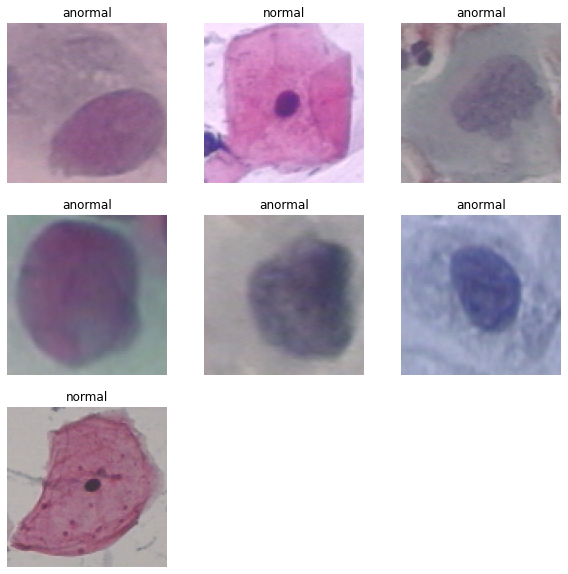

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(7):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [19]:
base_model = tf.keras.applications.VGG19(weights="imagenet", include_top=False, input_shape=IMG_SHAPE)
preprocess_input = tf.keras.applications.vgg19.preprocess_input
base_model.trainable = False

In [20]:
NEURONS = 1024
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(NEURONS*2, activation='relu')(x)
x = tf.keras.layers.Dense(NEURONS, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [21]:
model.compile(optimizer=OPT, loss=LOSS, metrics=METRICS)

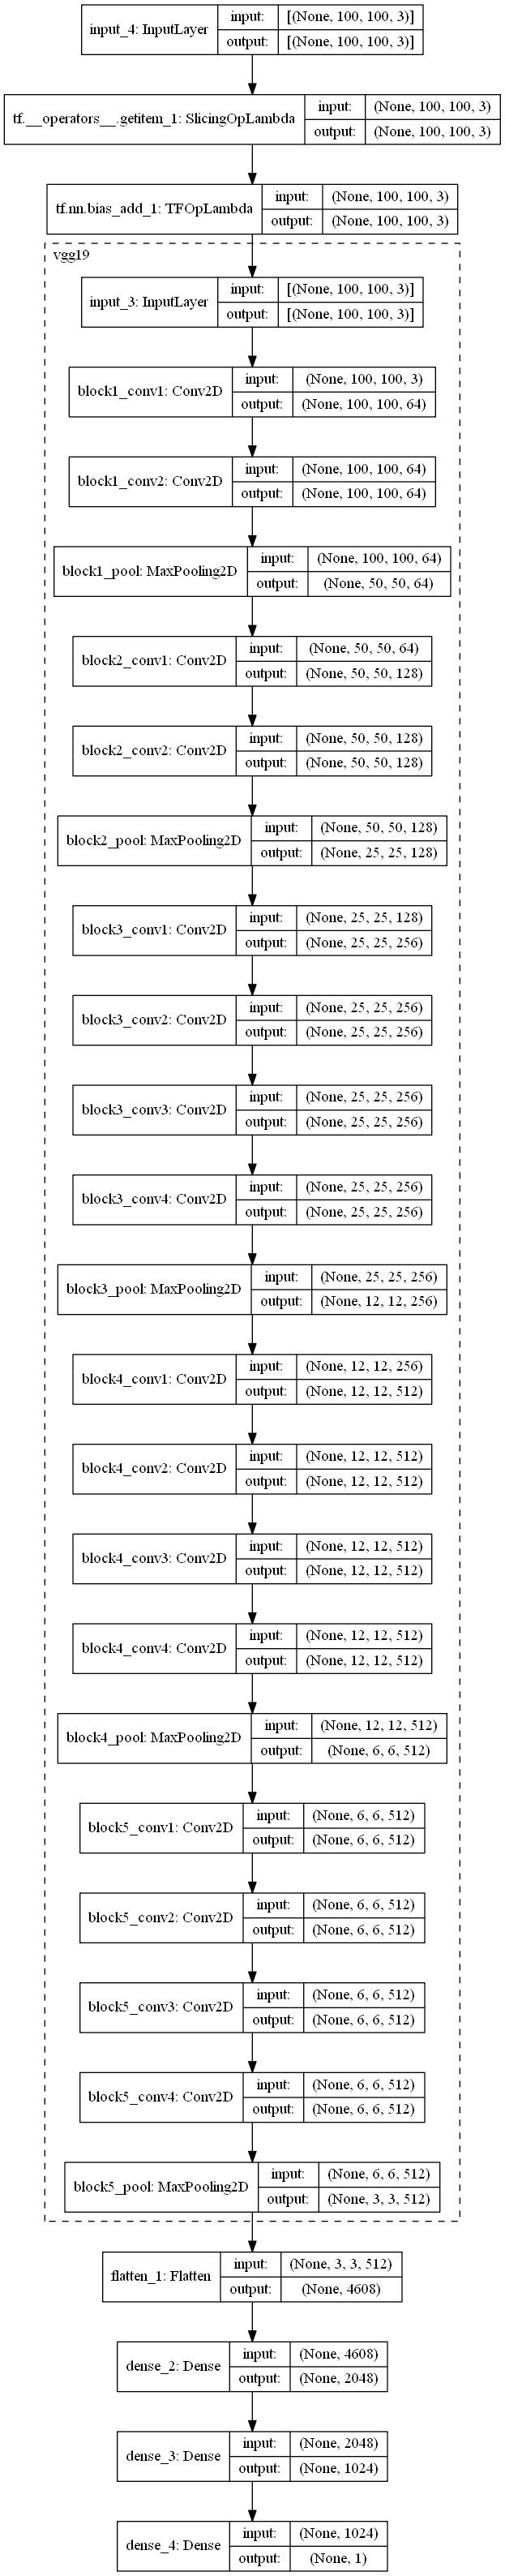

In [22]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, show_layer_names=True)

In [23]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_1 ( (None, 100, 100, 3)       0         
_________________________________________________________________
tf.nn.bias_add_1 (TFOpLambda (None, 100, 100, 3)       0         
_________________________________________________________________
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              9439232   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098

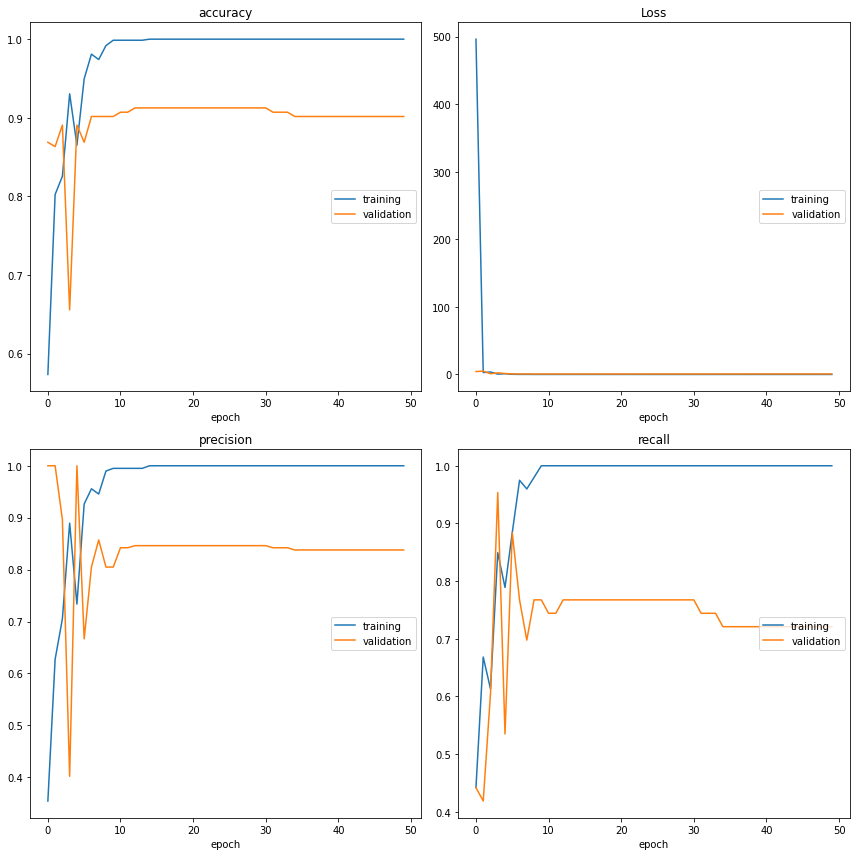

accuracy
	training         	 (min:    0.574, max:    1.000, cur:    1.000)
	validation       	 (min:    0.656, max:    0.913, cur:    0.902)
Loss
	training         	 (min:    0.000, max:  496.263, cur:    0.000)
	validation       	 (min:    0.593, max:    4.905, cur:    0.693)
precision
	training         	 (min:    0.354, max:    1.000, cur:    1.000)
	validation       	 (min:    0.402, max:    1.000, cur:    0.838)
recall
	training         	 (min:    0.442, max:    1.000, cur:    1.000)
	validation       	 (min:    0.419, max:    0.953, cur:    0.721)


In [24]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=[PlotLossesKerasTF()],
  epochs=EPOCHS
)

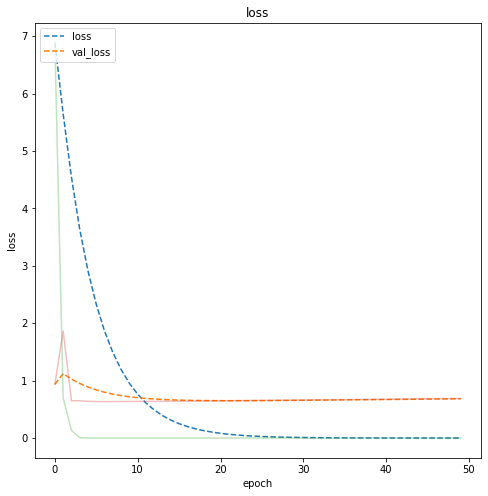

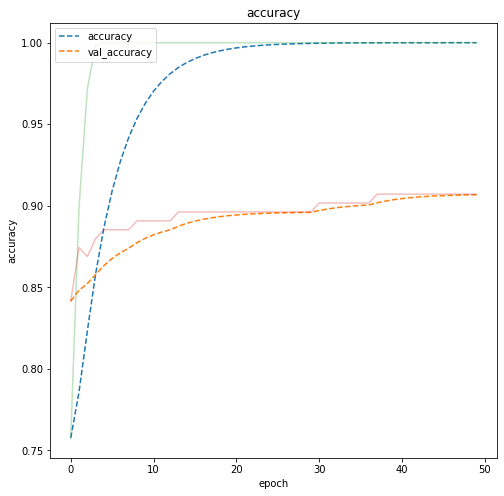

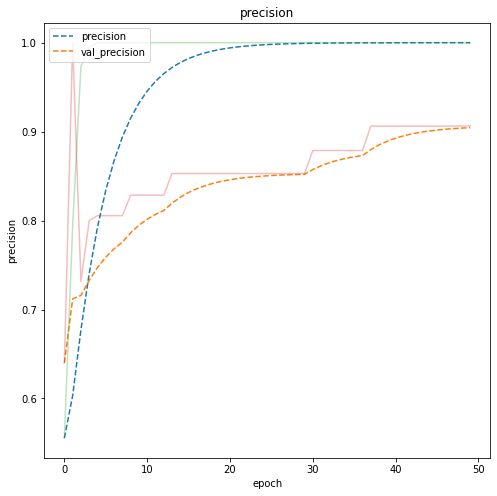

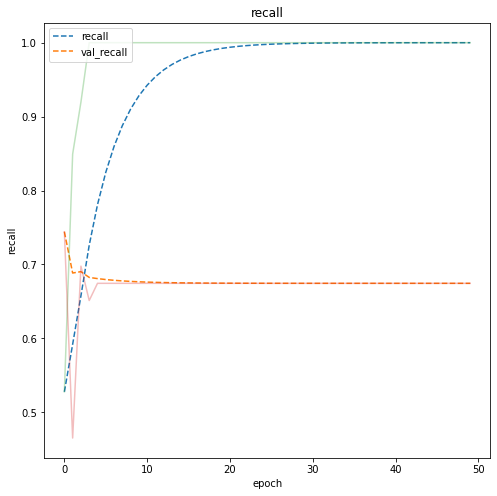

In [17]:
plot_metrics(history, metrics=['loss', 'accuracy', 'precision', 'recall'] , smooth=True)

In [18]:
evaluations = model.evaluate(val_ds, verbose=0)

for evaluation, metric_name in zip(evaluations, model.metrics_names):
  print(f"{metric_name}: {evaluation}")

loss: 0.6893309950828552
accuracy: 0.9071038365364075
precision: 0.90625
recall: 0.6744186282157898


In [25]:
base_model = tf.keras.applications.ResNet101(weights="imagenet", include_top=False, input_shape=IMG_SHAPE)
preprocess_input = tf.keras.applications.resnet.preprocess_input
base_model.trainable = False

171458560/171446536 [==============================] - 6s 0us/step


In [26]:
NEURONS = 1024
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(NEURONS, activation='relu')(x)
# x = tf.keras.layers.Dense(NEURONS, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

In [27]:
model.compile(optimizer=OPT, loss=LOSS, metrics=METRICS)

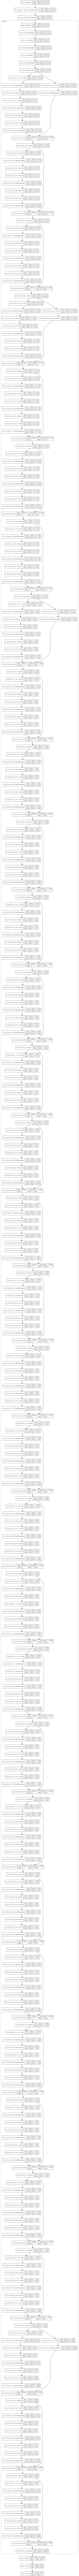

In [28]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True, show_layer_names=True)

In [29]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
tf.__operators__.getitem_2 ( (None, 100, 100, 3)       0         
_________________________________________________________________
tf.nn.bias_add_2 (TFOpLambda (None, 100, 100, 3)       0         
_________________________________________________________________
resnet101 (Functional)       (None, 4, 4, 2048)        42658176  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              33555456  
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1025

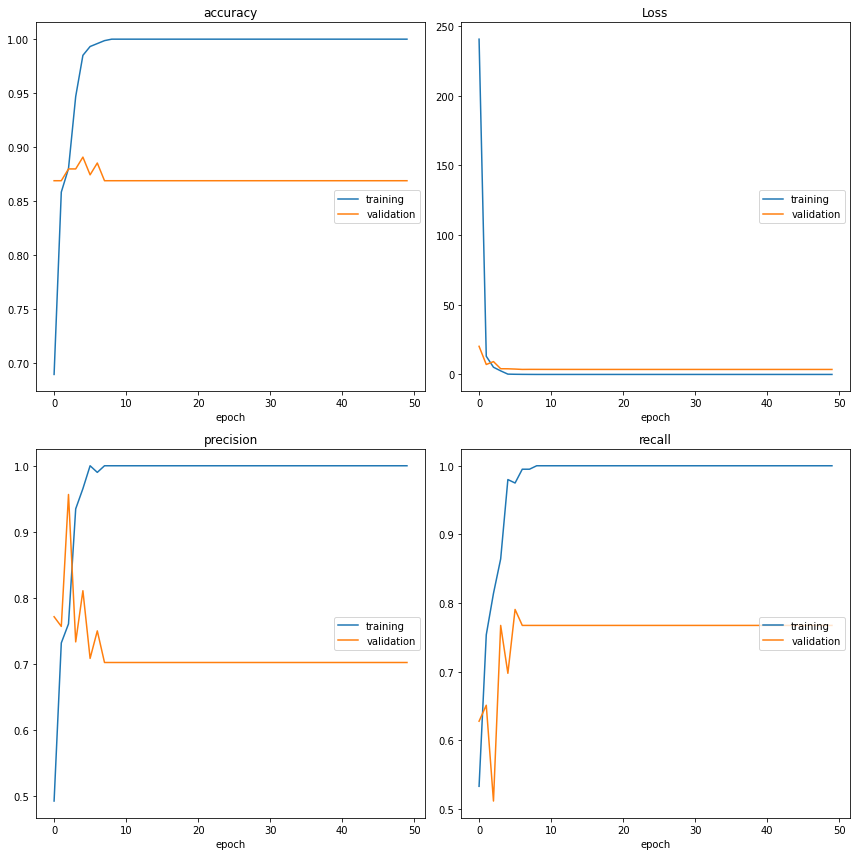

accuracy
	training         	 (min:    0.689, max:    1.000, cur:    1.000)
	validation       	 (min:    0.869, max:    0.891, cur:    0.869)
Loss
	training         	 (min:    0.000, max:  240.623, cur:    0.000)
	validation       	 (min:    3.580, max:   20.182, cur:    3.580)
precision
	training         	 (min:    0.492, max:    1.000, cur:    1.000)
	validation       	 (min:    0.702, max:    0.957, cur:    0.702)
recall
	training         	 (min:    0.533, max:    1.000, cur:    1.000)
	validation       	 (min:    0.512, max:    0.791, cur:    0.767)


In [30]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  callbacks=[PlotLossesKerasTF()],
  epochs=EPOCHS
)

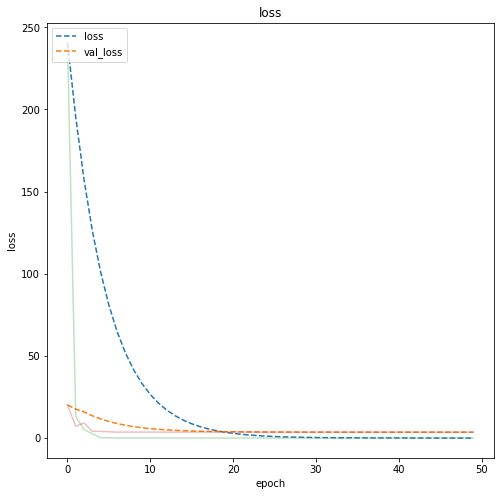

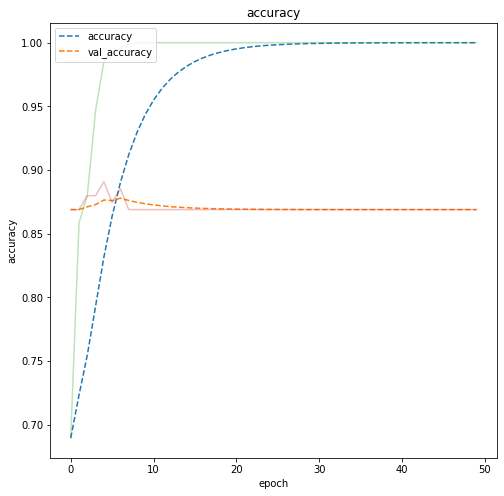

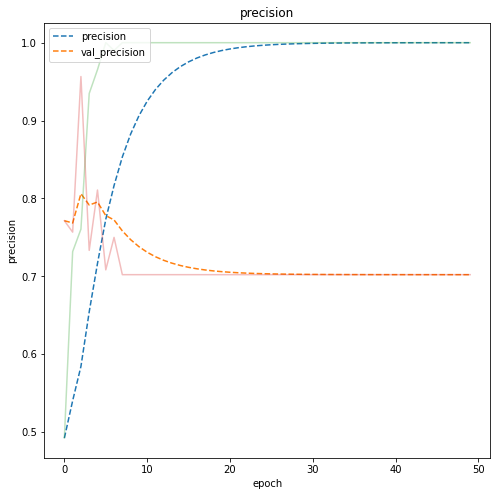

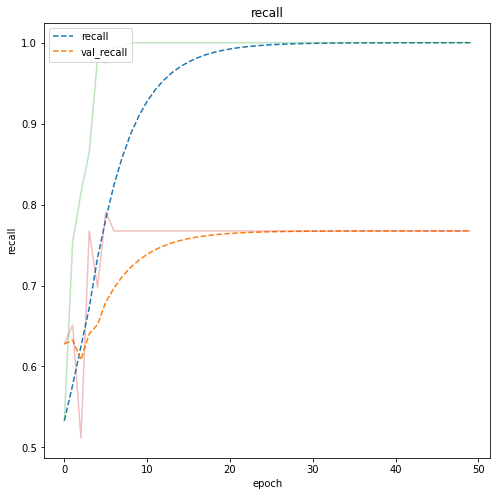

In [31]:
plot_metrics(history, metrics=['loss', 'accuracy', 'precision', 'recall'] , smooth=True)

In [32]:
evaluations = model.evaluate(val_ds, verbose=0)

for evaluation, metric_name in zip(evaluations, model.metrics_names):
  print(f"{metric_name}: {evaluation}")

loss: 3.580244779586792
accuracy: 0.868852436542511
precision: 0.7021276354789734
recall: 0.7674418687820435
